In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle
import pandas_profiling
from IPython.display import display
import ppscore as pps


In [2]:
pwd


'/home/imad/anaconda3'

In [3]:
df = pd.read_csv('/home/imad/anaconda3/titanic-train.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
report = pandas_profiling.ProfileReport(df)


In [6]:
report

In [7]:
report.to_file(output_file = 'report.html')

In [8]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [10]:
AV = AutoViz_Class()

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 2.147


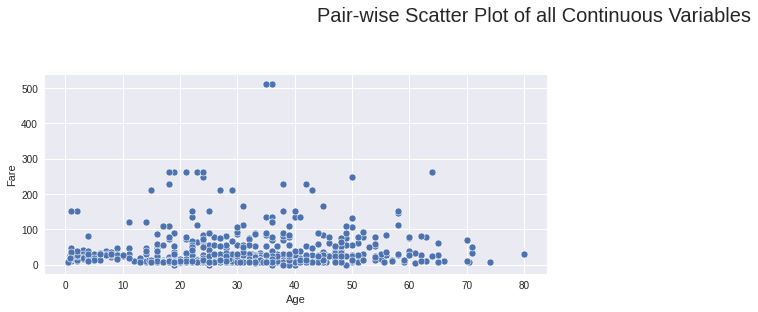

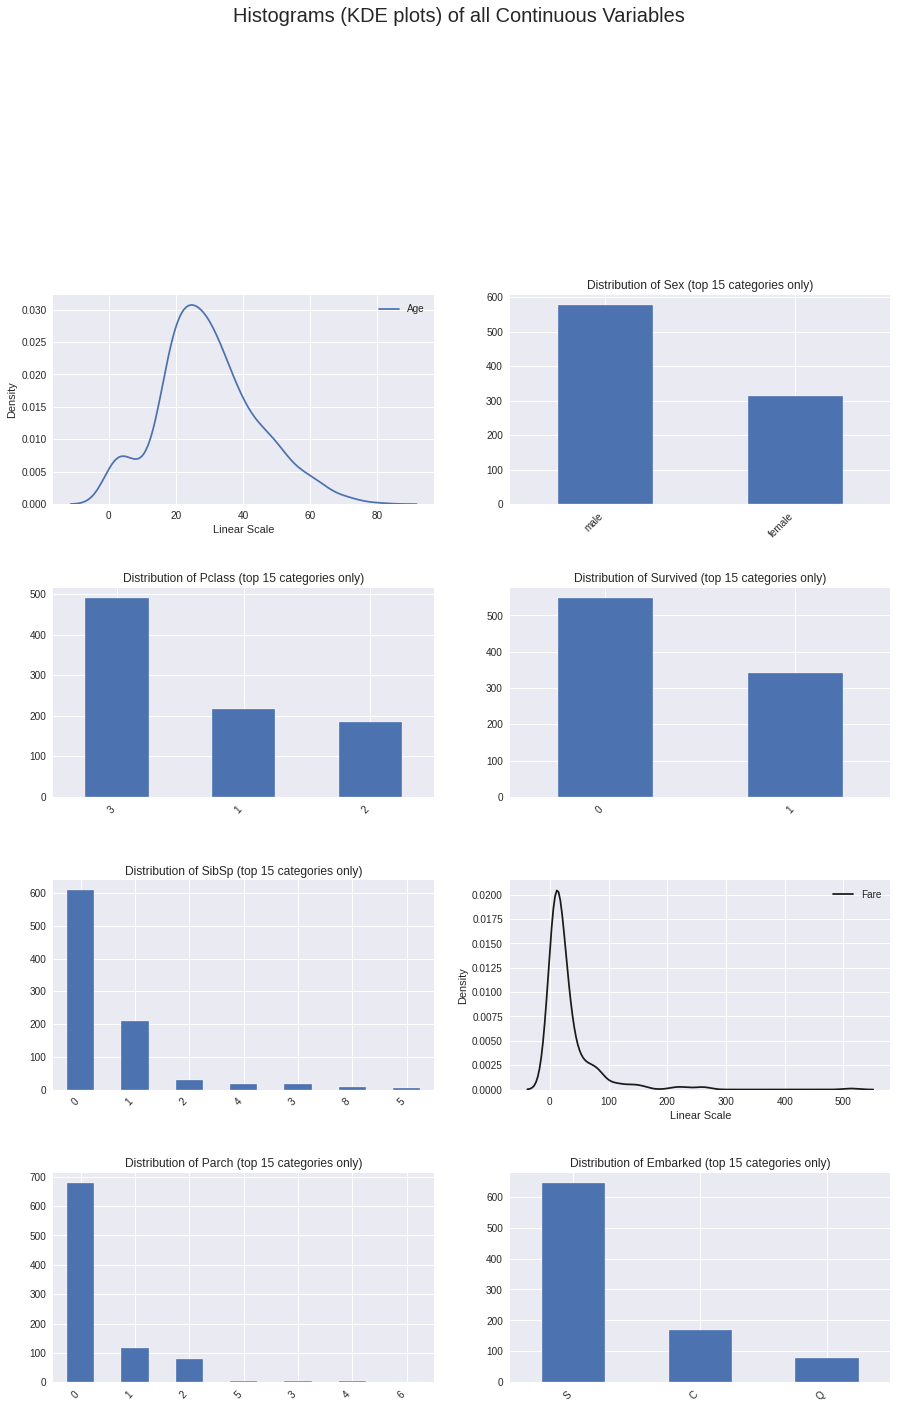

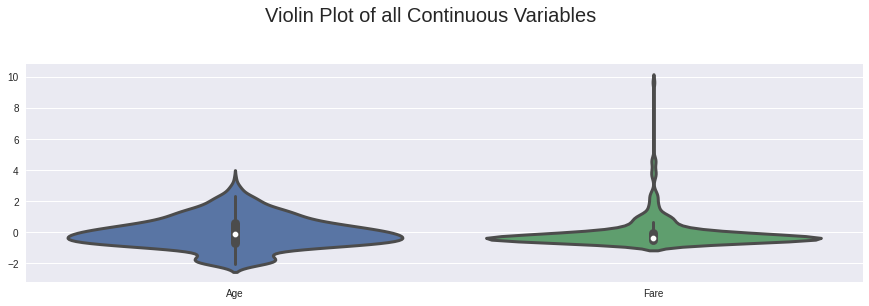

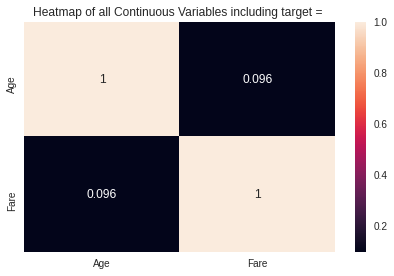

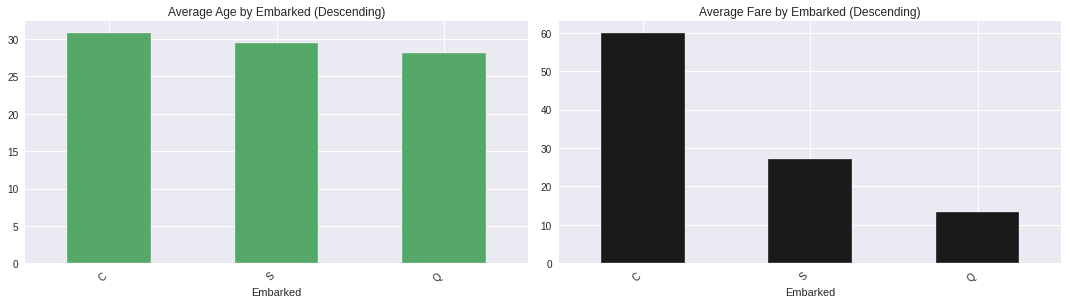

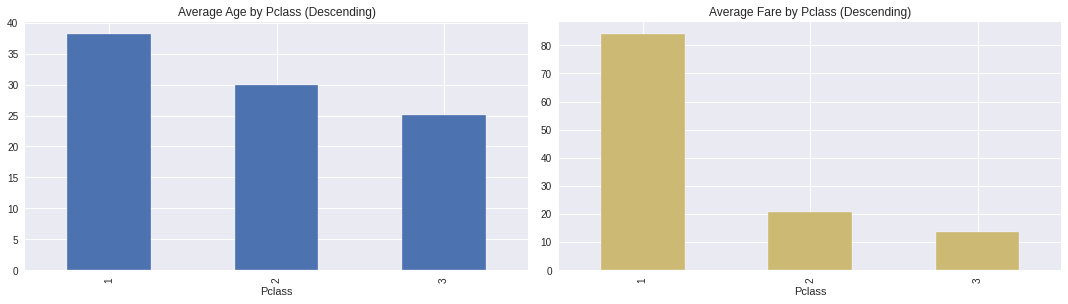

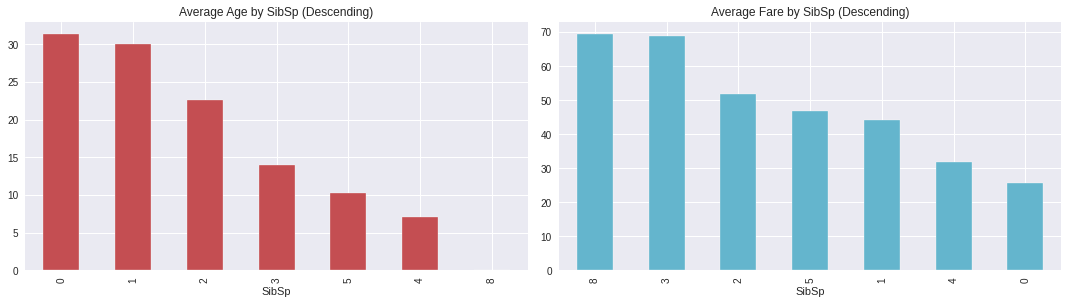

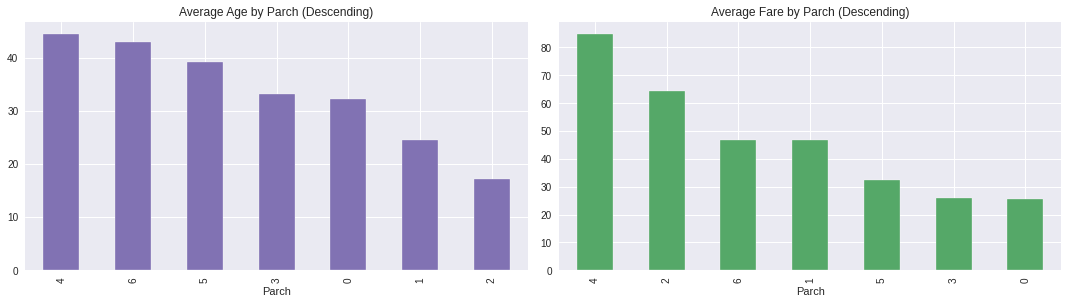

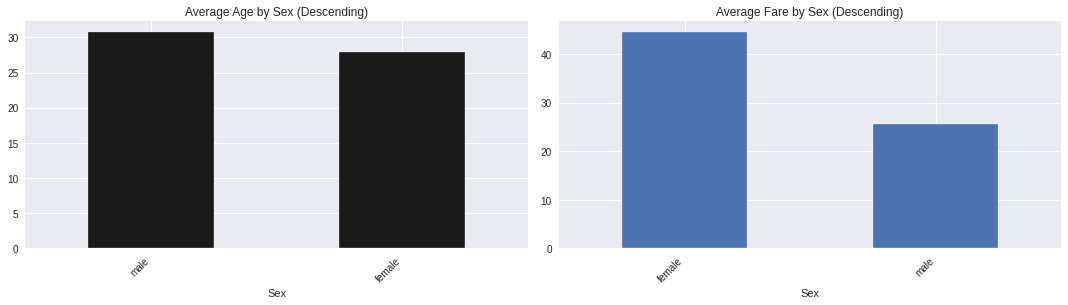

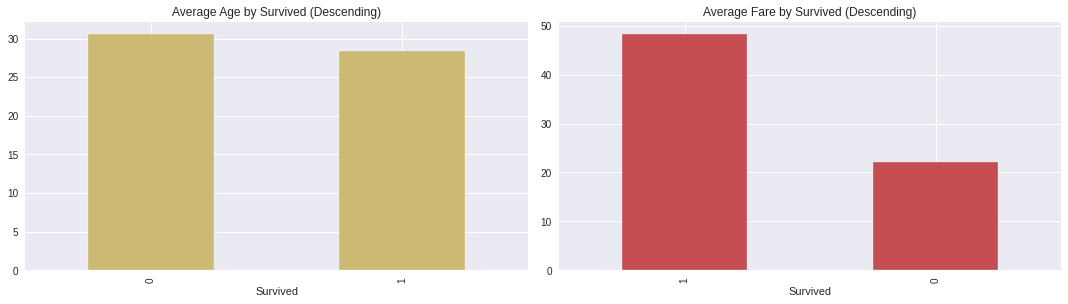

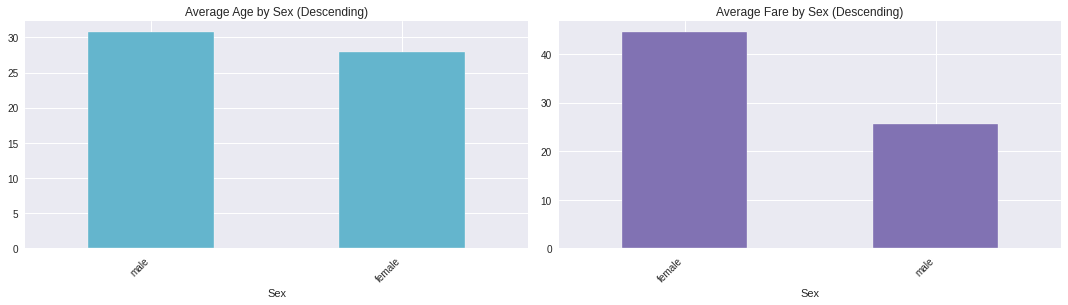

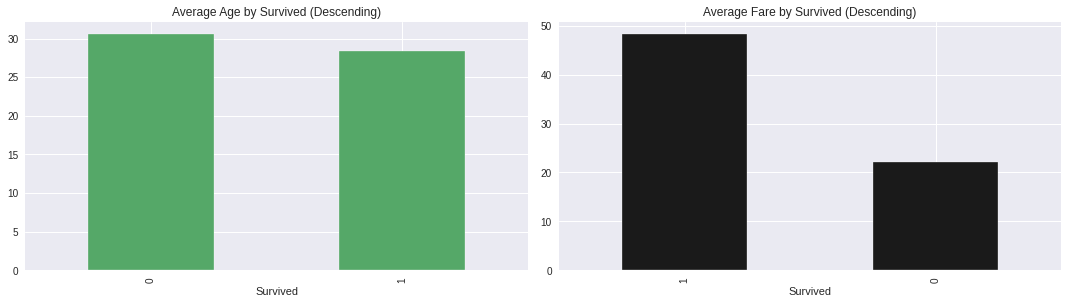

In [11]:
report2 = AV.AutoViz('/home/imad/anaconda3/titanic-train.csv')

In [12]:
report2.to_file(output_file = "report2.html")

AttributeError: 'DataFrame' object has no attribute 'to_file'

In [ ]:
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

In [ ]:
df_survivors.head(2)

In [ ]:
violin_survivors = go.Violin(
                    y = df_survivors['Age'],
                    x = df_survivors['Survived'],
                    name = "Survivors",
                    marker_color = 'forestgreen',
                    box_visible = True)

violin_nonsurvivors = go.Violin(
                    y = df_nonsurvivors['Age'],
                    x = df_nonsurvivors['Survived'],
                    name = "Survivors",
                    marker_color = 'darkred',
                    box_visible = True)

data = [violin_survivors,violin_nonsurvivors]
layout = go.Layout(title = "Survivors",
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  xaxis_title = "Survived",
                  yaxis_title = "Age",)

fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
dist_a = df_survivors['Age'].dropna()

In [ ]:
dist_a.head()

In [ ]:
dist_b = df_nonsurvivors.Age.dropna()

In [ ]:
dist_b.head()

In [ ]:
t_stat, p_value = ztest(dist_a, dist_b)
print("T stat :",t_stat )
print("P Value :", p_value)

In [ ]:
t_stat2, p_value2 = stats.ttest_ind(dist_a, dist_b)
print("T test: ", t_stat2)
print("P value: ", p_value2)

In [ ]:
df_survivors.columns

In [ ]:
df_survivors_sex = df_survivors['Sex'].value_counts()

In [ ]:
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()

In [ ]:
df_nonsurvivors_sex['count']

In [ ]:
df_survivors_sex = pd.DataFrame(df_survivors_sex, columns = ['Sex','Count'])

In [ ]:
df_nonsurvivors_sex = pd.DataFrame(df_nonsurvivors_sex, columns = ['Sex','Count'])

In [ ]:
df_survivors_sex = df_survivors['Sex'].value_counts()

In [ ]:
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})


In [ ]:
df_survivors_sex['Count'].astype(int)


In [ ]:
df_survivors_sex = df_survivors['Sex'].value_counts()
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()
df_nonsurvivors_sex = pd.DataFrame({'Sex':df_nonsurvivors_sex.index, 'count':df_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = df_survivors_sex['Sex'],
   values = df_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = df_nonsurvivors_sex['Sex'],
   values = df_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
fare_survivors_box = go.Box(  
   x=df_survivors['Fare'],
   name='Survivors',
   marker=dict(color='navy')
)

fare_nonsurvivors_box = go.Box(  
   x=df_nonsurvivors['Fare'],
   name='Non-Survivors',
   marker=dict(color='steelblue')
)
  
data = [fare_nonsurvivors_box, fare_survivors_box]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" value of survivors vs "Fare" value of non-survivors',
    barmode='stack',
    xaxis=dict(
        title='Fare distribution'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

In [63]:
import collections
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

     |████████████████████████████████| 1.7 MB 2.3 MB/s eta 0:00:01


In [ ]:
df

In [30]:
df['AgeCat'] = ""

In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeCat  
0      0         A/5 21171   7.2500   NaN        S         
1      0          PC 17599  71.2833   C85        C         
2      0  STON/O2. 3101282   7.9250   NaN        S         
3      0            113803  53.1000  C123        S         
4      0            373450   8.0500   NaN        S

In [32]:
df['AgeCat'].loc[(df['Age']<18)] = 'Young'

In [ ]:
df.head()

In [33]:
df['AgeCat'].loc[(df.Age >= 18 )& (df.Age <= 56 ) ]= 'Mature'

In [34]:
df['AgeCat'].loc[df['Age'] > 56] = 'Senior'

In [35]:
df['FamilySize'] = ""

In [36]:
df.FamilySize.loc[df.SibSp <= 2] = 'small'

In [37]:
df.FamilySize.loc[(df.SibSp > 2) & (df.SibSp <= 5)] = 'medium'

In [38]:
df.FamilySize.loc[(df.SibSp > 5)] = 'large'

In [ ]:
df.head()

In [39]:
df['IsAlone'] = ''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) > 0)] = 'no'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0)] = 'yes'


In [40]:
df['SexCat'] = ''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] <= 21)] = 'youngmale'
df['SexCat'].loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturemale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 50)] = 'seniormale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] <= 21)] = 'youngfemale'
df['SexCat'].loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturefemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 50)] = 'seniorfemale'

In [ ]:
df.head()

In [42]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')


In [43]:
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')


In [ ]:
df.head()

In [44]:
def get_feature_names(df):
    # Splitting the target
    target = df['Survived']

    # Dropping unused columns from the feature set
    df.drop(['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

    # Splitting categorical and numerical column dataframes
    categorical_df = df.select_dtypes(include=['object'])
    numeric_df = df.select_dtypes(exclude=['object'])

    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:\n", categorical_columns)
    print("\nNumeric columns:\n", numeric_columns)

    return target, categorical_columns, numeric_columns

target, categorical_columns, numeric_columns = get_feature_names(df)

Categorical columns:
 ['Sex', 'Embarked', 'AgeCat', 'FamilySize', 'IsAlone', 'SexCat', 'Title']

Numeric columns:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_Married', 'Ticket_Frequency']


In [ ]:
plt.hist(df.Age)

In [45]:
def balancingClassesRus(x_train, y_train):
    
    # Using RandomUnderSampler to balance our training data points
    rus = RandomUnderSampler(random_state=7)
    
    features_balanced, target_balanced = rus.fit_resample(x_train, y_train)

In [46]:
def balancingClassesRus(x_train, y_train):
    
    # Using RandomUnderSampler to balance our training data points
    rus = RandomUnderSampler(random_state=7)
    features_balanced, target_balanced = rus.fit_resample(x_train, y_train)
    
    print("Count for each class value after RandomUnderSampler:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmoteenn(x_train, y_train):
    
    # Using SMOTEEN to balance our training data points
    smn = SMOTEENN(random_state=7)
    features_balanced, target_balanced = smn.fit_resample(x_train, y_train)
    
    print("Count for each class value after SMOTEEN:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmote(x_train, y_train):

    # Using SMOTE to to balance our training data points
    sm = SMOTE(random_state=7)
    features_balanced, target_balanced = sm.fit_resample(x_train, y_train)

    print("Count for each class value after SMOTE:", collections.Counter(target_balanced))

    return features_balanced, target_balanced

In [47]:
def testSetResultsClassifier(classifier, x_test, y_test):
    predictions = classifier.predict(x_test)
    
    results = []
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append(f1)
    results.append(precision)
    results.append(recall)
    results.append(roc_auc)
    results.append(accuracy)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("F1 score, Precision, Recall, ROC_AUC score, Accuracy:")
    print(results)
    
    return results

In [98]:
def defineBestModelPipeline(df, target, categorical_columns, numeric_columns):
    x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.1, random_state = 42)    
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    x_train, y_train = balancingClassesRus(x_train, y_train)
    numeric_transformer_1 = Pipeline(steps = [('imp',IterativeImputer(max_iter = 30, random_state = 42)),
                                              ('scalar',MinMaxScaler())])
    numeric_transformer_2 = Pipeline(steps = [('imp',IterativeImputer(max_iter = 20, random_state = 42)),
                                              ('scalar',StandardScaler())])
    numeric_transformer_3 = Pipeline(steps = [('imp',SimpleImputer(strategy = 'mean')),
                                              ('scalar',MinMaxScaler())])
    numeric_transformer_4 = Pipeline(steps = [('imp',SimpleImputer(strategy = 'median')),
                                              ('scalar',StandardScaler())])
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
     
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), ('feature_eng', PCA()),  ('clf', SVC())])
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [KNeighborsClassifier()],
                     'clf__n_neighbors': stats.randint(1, 30),
                     'clf__metric': ['minkowski', 'euclidean']},

        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LogisticRegression()],
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': stats.uniform(0.01, 10)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [SVC()],
                     'clf__C': stats.uniform(0.01, 1),
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [DecisionTreeClassifier()],
                     'clf__criterion': ['gini', 'entropy'],
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': stats.randint(10, 175),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)],
                     'clf__random_state': stats.randint(1, 49)},
        
                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [ExtraTreesClassifier()],
                     'clf__n_estimators': stats.randint(10, 150),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 6)]},

                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [GradientBoostingClassifier()],
                     'clf__n_estimators': stats.randint(10, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': stats.randint(5, 125),
                     'clf__eta': stats.uniform(0.01, 1),
                     'clf__max_depth': [None, stats.randint(1, 6)],
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [StackingClassifier(estimators=[('svc', SVC(C=1, gamma=1)),
                                                            ('rf', RandomForestClassifier(max_depth=7, max_features=None, n_estimators=60, n_jobs=-1, random_state=49)),
                                                            ('xgb', XGBClassifier(eta=0.6, gamma=0.7, max_depth=None, n_estimators=30))], 
                                                final_estimator=LogisticRegression(C=1))]},
   
   
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [VotingClassifier(estimators=[('gbt', GradientBoostingClassifier(learning_rate=0.8, max_depth=None, n_estimators=30)),
                                                          ('lgbm', LGBMClassifier(n_estimators=30, learning_rate=0.6, max_depth=None)),
                                                          ('xgb', XGBClassifier(eta=0.8, gamma=0.8, max_depth=None, n_estimators=40))],
                                              voting='soft')]}
                ]
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    best_model_pipeline = RandomizedSearchCV(pipe, params_grid, n_iter=100, 
                                             scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=5, random_state=42)
    best_model_pipeline.fit(x_train, y_train)
    
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [101]:
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, categorical_columns, numeric_columns)


Count for each class value after RandomUnderSampler: Counter({0: 306, 1: 306})


#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#

 ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  IterativeImputer(max_iter=30,
                                                                   random_state=42)),
                                                 ('scalar', MinMaxScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                                  'Is_Married', 'Ticket_Frequency']),
                                ('cat',
                                 Pipeline(steps=[('frequent',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(use_cat_names=True))]),
      

In [102]:
test_set_results = testSetResultsClassifier(best_model_pipeline, x_test, y_test)



#---------------- Test set results (Best Classifier) ----------------#

F1 score, Precision, Recall, ROC_AUC score, Accuracy:
[0.7948717948717949, 0.7380952380952381, 0.8611111111111112, 0.8287037037037037, 0.8222222222222222]


In [106]:
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.523119      0.122259         0.095029        0.004998   
1        1.141755      0.027606         0.088296        0.004478   
2        0.204489      0.006890         0.000000        0.000000   
3        0.239294      0.028308         0.099210        0.023268   
4        0.334746      0.018454         0.091878        0.015169   
..            ...           ...              ...             ...   
95       3.268125      0.235067         0.349268        0.040723   
96       0.227541      0.023273         0.000000        0.000000   
97       0.176450      0.017438         0.086006        0.008453   
98       0.171339      0.018105         0.000000        0.000000   
99       0.152565      0.028096         0.085325        0.018719   

                                            param_clf  \
0                        GradientBoostingClassifier()   
1                        GradientBoostingClassifier()   
2                            DecisionTreeClassifier()   
3             LogisticRegression(C=3.235507642386005)   
4                            RandomForestClassifier()   
..                                                ...   
95  StackingClassifier(estimators=[('svc', SVC(C=1...   
96                                   LGBMClassifier()   
97            LogisticRegression(C=3.235507642386005)   
98                           DecisionTreeClassifier()   
99                             KNeighborsClassifier()   

   param_clf__learning_rate  \
0                   0.56758   
1                  0.322083   
2                       NaN   
3                       NaN   
4                       NaN   
..                      ...   
95                      NaN   
96                 0.471086   
97                      NaN   
98                      NaN   
99                      NaN   

                                 param_clf__max_depth param_clf__n_estimators  \
0                                                None                      81   
1                                                None                      84   
2   <scipy.stats._distn_infrastructure.rv_frozen o...                     NaN   
3                                                 NaN                     NaN   
4                                                None                      31   
..                                                ...                     ...   
95                                                NaN                     NaN   
96  <scipy.stats._distn_infrastructure.rv_frozen o...                      16   
97                                                NaN                     NaN   
98  <scipy.stats._distn_infrastructure.rv_frozen o...                     NaN   
99                                                NaN                     NaN   

                           param_data_transformations  \
0   ColumnTransformer(transformers=[('num',\n     ...   
1   ColumnTransformer(transformers=[('num',\n     ...   
2   ColumnTransformer(transformers=[('num',\n     ...   
3   ColumnTransformer(transformers=[('num',\n     ...   
4   ColumnTransformer(transformers=[('num',\n     ...   
..                                                ...   
95  ColumnTransformer(transformers=[('num',\n     ...   
96  ColumnTransformer(transformers=[('num',\n     ...   
97  ColumnTransformer(transformers=[('num',\n     ...   
98  ColumnTransformer(transformers=[('num',\n     ...   
99  ColumnTransformer(transformers=[('num',\n     ...   

               param_feature_eng  ... std_test_f1 rank_test_f1  \
0   PolynomialFeatures(degree=1)  ...    0.018968           65   
1   PolynomialFeatures(degree=1)  ...    0.035229           55   
2   PolynomialFeatures(degree=1)  ...         NaN           78   
3           PCA(n_components=13)  ...    0.033432            9   
4                           None  ...    0.035841           29   
..                           ...  ...         ...          ...   
95       